# Theoretical Structure
- Read from dataset 
- Image Augmentation (Scale, Stretch, Zoom, Rotate, Tilt, Buffer, Shifts, Flips, Saturation, etc.)
- Construct NN Structure
- Feed Data
- Split Data into training and testing data
- Train Model
- Test Model
- Save Model
- Read and input test.png into trained model and output Results

TODO:
- automatically check data folder for file changes and retrain only if needed

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import AlbumCovers

In [2]:
images, labels, class_names = AlbumCovers.load_data()
images = images / 255.0

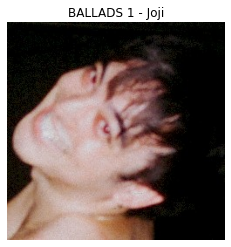

In [3]:
# Displays a random train image to verify data import was succesful
index = np.random.randint(len(images))

plt.figure()
plt.imshow(images[index])
plt.title(class_names[labels[index]])
plt.axis("off")
plt.show()
 

In [4]:
#Creating the Network: Sets up the Convolutional Layers, NN Structure, connection types, and activation functions
img_dims = images[0].shape
model = keras.Sequential([
    keras.layers.Conv2D(125, (25, 25), activation='relu', input_shape=img_dims),     #-|
    keras.layers.MaxPooling2D((2, 2)),                                               # |  Convolutional Base
    keras.layers.Conv2D(125, (25, 25), activation='relu',),                             # |  Takes Image and breaks down components
    keras.layers.MaxPooling2D((2, 2)),                                               # |  Passes information about components to Perceptron for analysis 
    keras.layers.Conv2D(125, (25, 25), activation='relu',),                             #-|                                               

    keras.layers.Flatten(),                                                           #Sets "input" layer equal to flattened version of last pooling       
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax'),                     
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 125)     234500    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 125)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 89, 125)       9765750   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 125)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 125)       9765750   
                                                                 
 flatten (Flatten)           (None, 50000)             0

In [5]:
#Compile the Model: Sets up the models loss function, optimizer, and metrics
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [6]:
# #Trains Model
# model.fit(train_images, train_labels, epochs=len(class_names)) 

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_test_split = 0.8
train_images, test_images = images[:int(len(images)*train_test_split)], images[int(len(images)*train_test_split):]
train_labels, test_labels = labels[:int(len(labels)*train_test_split)], labels[int(len(labels)*train_test_split):]

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
  rotation_range=45,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)
datagen.fit(train_images)



model.fit(datagen.flow(train_images, train_labels, subset="training"), validation_data = datagen.flow(test_images, test_labels, subset="testing"), setps_per_epoch = len(train_images), epochs=10)

ValueError: Training and validation subsets have different number of classes after the split. If your numpy arrays are sorted by the label, you might want to shuffle them.

In [ ]:
labels

In [ ]:
index = 2

prediction = model.predict(test_images)
guess = np.argmax(prediction[0][index])

plt.figure()
plt.imshow(train_images[index])
plt.title("Guess is " + class_names[guess] + "\n" + '{:.2f}'.format(prediction[0][guess]*100) + "% confidence")
plt.axis("off")
plt.show()

In [ ]:
class_names